In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential

import glob, os, random

Using TensorFlow backend.


In [2]:
base_path = '../input/garbage classification/Garbage classification'

img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

print(len(img_list))

2527


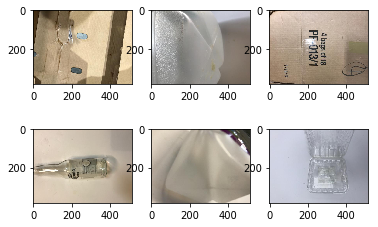

In [3]:
for i, img_path in enumerate(random.sample(img_list, 6)):
    img = load_img(img_path)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(300, 300),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

print(labels)

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.
{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [5]:
model = Sequential([
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size=2),

    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),
    
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(pool_size=2),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 32)        9248      
__________

# Take a Shot

In [6]:
model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
143/143 [==============================] - 58s 407ms/step - loss: 1.6556 - acc: 0.2701 - val_loss: 1.5572 - val_acc: 0.2869
Epoch 2/20
143/143 [==============================] - 54s 374ms/step - loss: 1.4564 - acc: 0.4060 - val_loss: 1.5110 - val_acc: 0.3745
Epoch 3/20
143/143 [==============================] - 54s 375ms/step - loss: 1.3114 - acc: 0.4633 - val_loss: 1.2588 - val_acc: 0.4781
Epoch 4/20
143/143 [==============================] - 53s 374ms/step - loss: 1.2136 - acc: 0.5223 - val_loss: 1.2754 - val_acc: 0.4781
Epoch 5/20
143/143 [==============================] - 53s 373ms/step - loss: 1.1318 - acc: 0.5616 - val_loss: 1.1743 - val_acc: 0.5339
Epoch 6/20
143/143 [==============================] - 53s 368ms/step - loss: 1.0588 - acc: 0.6075 - val_loss: 1.1244 - val_acc: 0.5777
Epoch 7/20
143/143 [==============================] - 53s 368ms/step - loss: 1.0042 - acc: 0.6206 - val_loss: 1.1450 - val_acc: 0.5777
Epoch 8/20
143/143 [==============================] - 5

# Another Shot

In [7]:
model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
143/143 [==============================] - 53s 369ms/step - loss: 0.6312 - acc: 0.7631 - val_loss: 0.8546 - val_acc: 0.7131
Epoch 2/20
143/143 [==============================] - 52s 364ms/step - loss: 0.6363 - acc: 0.7801 - val_loss: 0.9765 - val_acc: 0.6574
Epoch 3/20
143/143 [==============================] - 53s 370ms/step - loss: 0.5872 - acc: 0.7819 - val_loss: 1.1102 - val_acc: 0.6375
Epoch 4/20
143/143 [==============================] - 52s 367ms/step - loss: 0.5932 - acc: 0.7854 - val_loss: 0.9313 - val_acc: 0.7052
Epoch 5/20
143/143 [==============================] - 52s 365ms/step - loss: 0.5670 - acc: 0.7989 - val_loss: 0.8666 - val_acc: 0.7291
Epoch 6/20
143/143 [==============================] - 53s 369ms/step - loss: 0.5448 - acc: 0.8011 - val_loss: 0.9256 - val_acc: 0.7092
Epoch 7/20
143/143 [==============================] - 53s 371ms/step - loss: 0.5620 - acc: 0.7898 - val_loss: 0.8885 - val_acc: 0.6932
Epoch 8/20
143/143 [==============================] - 5

In [8]:
model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
143/143 [==============================] - 54s 375ms/step - loss: 0.4376 - acc: 0.8440 - val_loss: 0.8532 - val_acc: 0.7450
Epoch 2/20
143/143 [==============================] - 52s 367ms/step - loss: 0.4317 - acc: 0.8527 - val_loss: 0.8926 - val_acc: 0.7371
Epoch 3/20
143/143 [==============================] - 53s 368ms/step - loss: 0.4020 - acc: 0.8597 - val_loss: 0.8003 - val_acc: 0.7371
Epoch 4/20
143/143 [==============================] - 53s 369ms/step - loss: 0.3933 - acc: 0.8632 - val_loss: 1.0984 - val_acc: 0.7251
Epoch 5/20
143/143 [==============================] - 53s 369ms/step - loss: 0.4354 - acc: 0.8466 - val_loss: 1.0784 - val_acc: 0.6892
Epoch 6/20
143/143 [==============================] - 53s 368ms/step - loss: 0.4361 - acc: 0.8431 - val_loss: 0.8046 - val_acc: 0.7331
Epoch 7/20
143/143 [==============================] - 52s 365ms/step - loss: 0.3698 - acc: 0.8649 - val_loss: 0.9228 - val_acc: 0.7291
Epoch 8/20
143/143 [==============================] - 5

In [9]:
model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
143/143 [==============================] - 54s 377ms/step - loss: 0.3135 - acc: 0.8899 - val_loss: 1.0099 - val_acc: 0.7570
Epoch 2/20
143/143 [==============================] - 54s 375ms/step - loss: 0.3138 - acc: 0.8903 - val_loss: 0.9470 - val_acc: 0.7291
Epoch 3/20
143/143 [==============================] - 53s 372ms/step - loss: 0.2972 - acc: 0.8881 - val_loss: 0.9074 - val_acc: 0.7490
Epoch 4/20
143/143 [==============================] - 53s 374ms/step - loss: 0.2663 - acc: 0.9078 - val_loss: 1.0864 - val_acc: 0.7410
Epoch 5/20
143/143 [==============================] - 53s 367ms/step - loss: 0.3199 - acc: 0.8881 - val_loss: 1.0619 - val_acc: 0.7171
Epoch 6/20
143/143 [==============================] - 53s 371ms/step - loss: 0.3268 - acc: 0.8868 - val_loss: 1.2340 - val_acc: 0.6614
Epoch 7/20
143/143 [==============================] - 54s 375ms/step - loss: 0.3206 - acc: 0.8798 - val_loss: 0.8954 - val_acc: 0.7410
Epoch 8/20
143/143 [==============================] - 5

In [10]:
model.fit_generator(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
143/143 [==============================] - 52s 365ms/step - loss: 0.2674 - acc: 0.9069 - val_loss: 1.1621 - val_acc: 0.7291
Epoch 2/20
143/143 [==============================] - 52s 363ms/step - loss: 0.2424 - acc: 0.9135 - val_loss: 1.0447 - val_acc: 0.7530
Epoch 3/20
143/143 [==============================] - 52s 361ms/step - loss: 0.2204 - acc: 0.9196 - val_loss: 0.9644 - val_acc: 0.7331
Epoch 4/20
143/143 [==============================] - 52s 363ms/step - loss: 0.2619 - acc: 0.9073 - val_loss: 1.1428 - val_acc: 0.7530
Epoch 5/20
143/143 [==============================] - 52s 366ms/step - loss: 0.2635 - acc: 0.9017 - val_loss: 0.9123 - val_acc: 0.7849
Epoch 6/20
143/143 [==============================] - 52s 367ms/step - loss: 0.2579 - acc: 0.9087 - val_loss: 1.0650 - val_acc: 0.7530
Epoch 7/20
143/143 [==============================] - 52s 362ms/step - loss: 0.2498 - acc: 0.9108 - val_loss: 0.9930 - val_acc: 0.7570
Epoch 8/20
143/143 [==============================] - 5

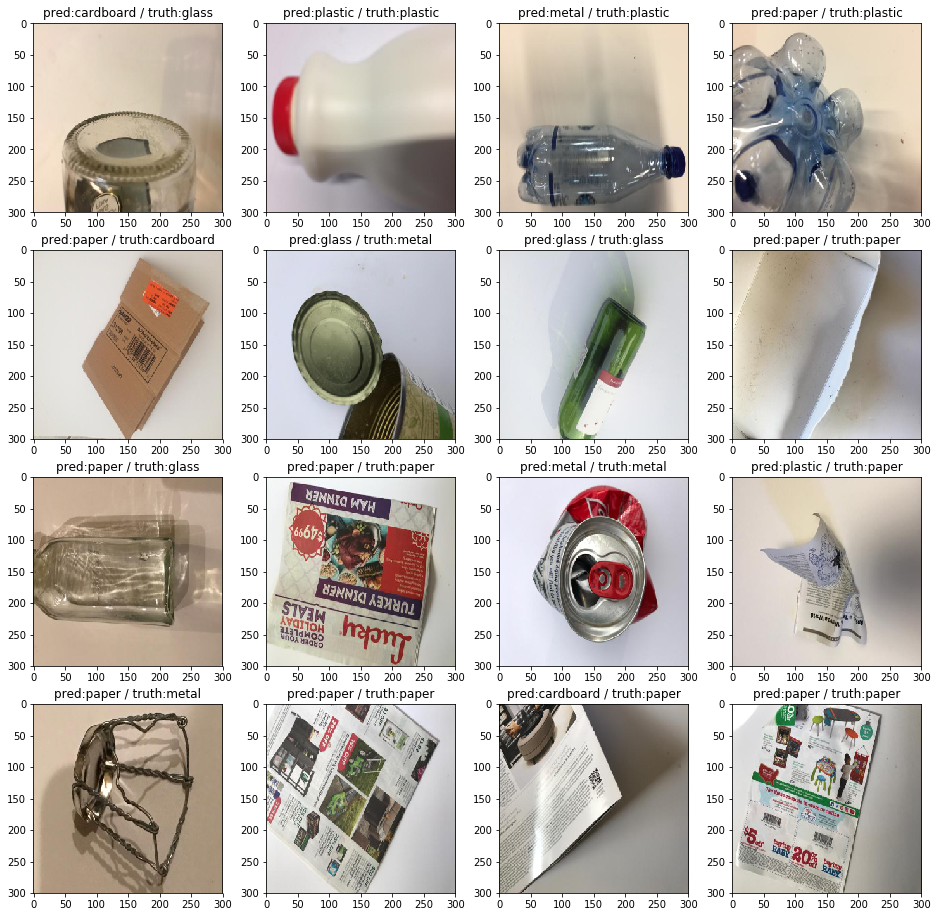

In [11]:
test_x, test_y = validation_generator.__getitem__(1)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])